
## MED 3

# Regresja wielomianowa

Wczytanie niezbędnych bibliotek


In [2]:
# %matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# 1. Wprowadzenie teoretyczne

Celem regresji wielomianowej jest dopasowanie do danych doświadczalnych/historycznych wykresu funkcji, która oddaje charakter tych danych. 

Zadanie polega na znalezieniu wielomianu $\hat{f}(x)$ postaci:

$$\hat{f}(x)=w_0+w_1 x^1+w_2x^2+ … +w_n x^n,$$

gdzie $x \in R$, a $w∈R^N$ jest wektorem zawierającym współczynniki wielomianu. 

To właśnie na znalezieniu wektora $w$ będziemy skupiać uwagę.

Mając dane historyczne  $X={x_1,x_2,…,x_k}$ oraz odpowiadające im wartości $Y={y_1,y_2,…,y_k}$ będziemy poszukiwać najlepiej dopasowanego wektora $w$. Co to dla nas znaczy?

W efekcie musimy znaleźć takie parametry modelu (wielomianu), które zminimalizują nam sumę kwadratów błędu (RSE). 

Czyli takiego, dla którego wartości zwracane przez funkcję $\hat{f}$ i odpowiadające im wartości rzeczywiste najmniej się różnią. 
Załóżmy, że mamy już wybrany wektor np. $w=[1,0.5,0,0,2,0.3,…,1]$ 
możemy obliczyć:

$$\hat{f}(x_1)=w_0 + w_1x_1^1+w_2x_1^2+...+w_nx_1^n$$

$$\hat{f}(x_2)=w_0 + w_1x_2^1+w_2x_2^2+...+w_nx_2^n$$

$$\vdots$$

$$\hat{f}(x_k)=w_0 + w_1x_k^1+w_2x_k^2+...+w_nx_k^n$$

Błąd dopasowania możemy wyliczyć poprzez porównanie wartości otrzymanej dla danego argumentu $\hat{f}(x_i)$ z wartością rzeczywistą $y_i$ odpowiadającą temu argumentowi, stąd mamy

$$e^1=\hat{f}(x_1)−y_1$$
$$e^2=\hat{f}(x_2)−y_2$$
$$\vdots$$
$$e^k=\hat{f}(x_k)−y_k$$


Następnie sumując kwadraty błędów $e^1, … , e^k$ otrzymujemy wartość błędów dla danych parametrów modelu:

$$E(w)=\sum_{i=1}^k\left(\hat{f}(x_i)−y_i\right)^2$$

Chcemy aby suma kwadratów błędów była jak najmniejsza dla danego stopnia wielomianu, a to co możemy zmieniać to wartości współczynników wektora $w$. 

Powyższe analizy możmy zapisać w postaci macierzowej.
 $X  w = Y$  gdzie

$$X = \left|\begin{array}{cccc}
1&x_1&...&x_1^n\\
1&x_2&...&x_2^n\\
\vdots&\vdots&\vdots&\vdots\\
1&x_k&...&x_k^n\end{array}\right|, $$

$$w = \left|\begin{array}{c}
w_0\\
w_1\\
...\\
w_n\end{array}\right|, $$


$$Y = \left|\begin{array}{c}
y_0\\
y_1\\
...\\
y_k\end{array}\right|. $$

Ponieważ w ogólnym przypadku macierz $X$ jest macierzą prostokątną, więc nie można jej odwrócić (nie da się wyzerować błędu aproksymacji), za to możemy znaleźć rozwiązanie przybliżone (takie, które minimalizuje nasz błąd):


$$\min_w||Xw−Y||_2^2$$

Rozwiązaniem, które jest w stanie zminimalizować nam sumę kwadratów błędu jest równanie:

$ w=X^+Y,$

gdzie $X^+$ jest pseudoodwrotnością macierzy $X$.

# 2. Od korelacji do prostej regresji liniowej

Miara korelacji (Pearsona) pozwala na stwierdzenie stopnia zależności liniowej atrybutów (cech). Dla przypomnienia - zbiór `iris`

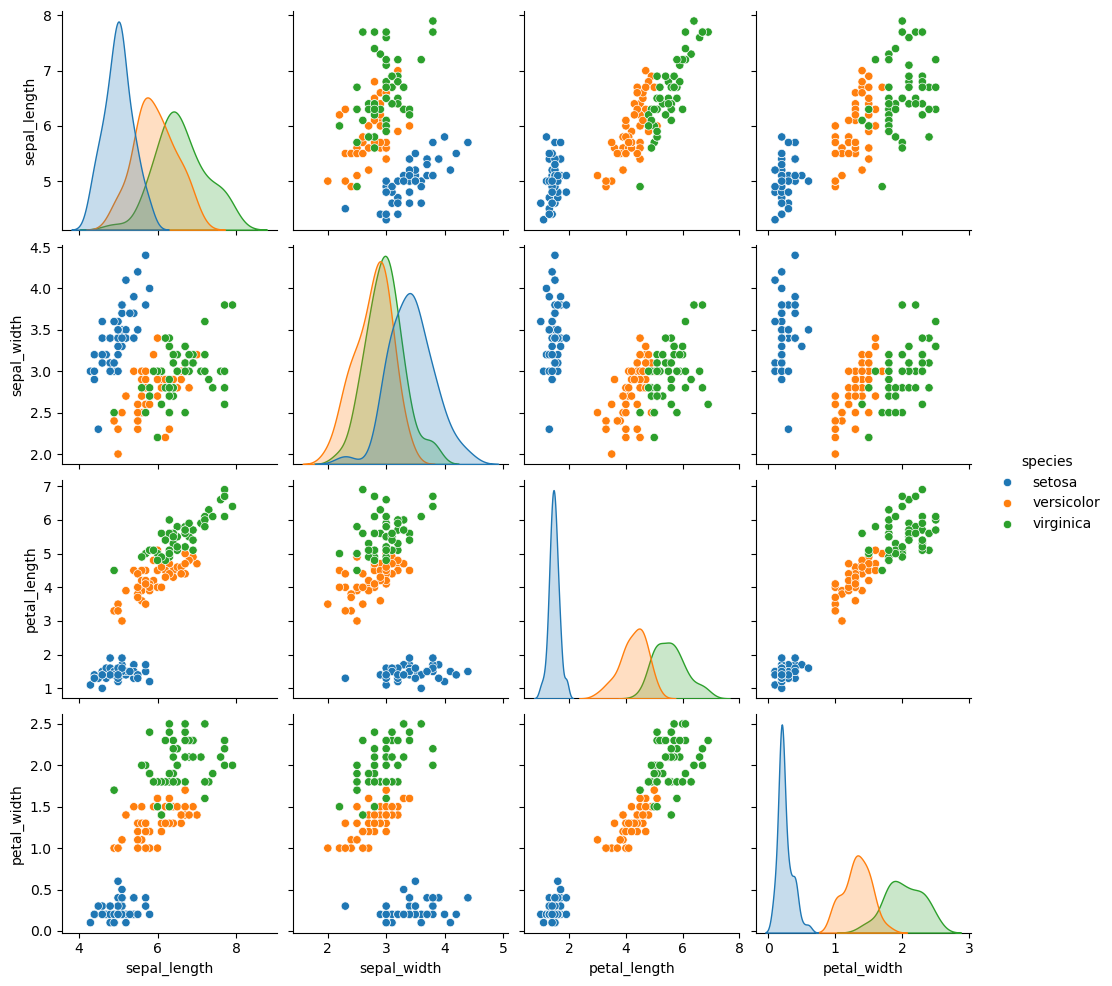

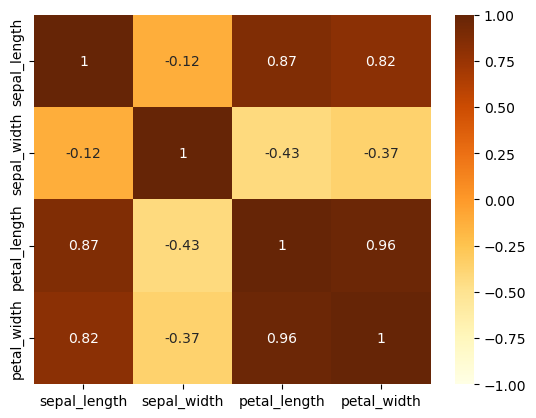

In [3]:
from seaborn import load_dataset
iris = load_dataset("iris")
iris.head()

numerical_iris = iris.select_dtypes(include=[np.number]).columns

sns.pairplot(iris, vars=numerical_iris, kind="scatter", hue = "species")
plt.show()


sns.heatmap(iris[numerical_iris].corr(), annot=True, vmin=-1, vmax=1, cmap="YlOrBr")
plt.show()

> **Zadanie** Wskaż atrybuty najbardziej i najmniej skorelowane

Najbardziej skorelowane atrybuty to petal_length z petal_width a najmniej to sepal_width z sepal_length

Miara korelacji Pearsona odpowiada na pytanie *$czy$* (w jakim stopniu) dane atrybuty ($x,y$) są od siebie zależne liniowo. Odpowiedzi na pytanie *$jak$* od siebie zależą, udzieli model regresyjny. W tym przypadku będzie badany najprostszy model regresji wielomianowej tj. prosta regresja liniowa. Jej wynikiem jest linia prosta $$\hat y = \hat{f}(x) = w_0 + w_1 \cdot x,$$ która pozwala na oszacowanie wartości atrybutu $y$ na podstawie atrybutu $x$. 

Przykład - tworzenie modelu regresyjnego zależności czwartego atrybutu (petal width) od pierwszego (sepal length). Metoda `iloc` umożliwia odwołanie do elementów ramki danych przez ich indeksy, `values` konwertuje wynikową ramkę danych na postać wektora, `reshape` zamienia wektor na macierz o jednej kolumnie. `T` oznacza transpozycję, dzięki której łatwiej zmieścić wydruk w oknie.

In [4]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
print(x.T)
print(y.T)

[[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
  5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
  5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
  6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
  6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
  5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
  6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
  6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
  6.7 6.7 6.3 6.5 6.2 5.9]]
[[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
  0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.2 0.2
  0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
  1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
  1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
  1.2 1.4 1

Tworzenie modelu regresyjnego.

In [5]:
x = iris.iloc[:,0].values.reshape(-1,1)
y = iris.iloc[:,3].values.reshape(-1,1)
regressor = LinearRegression()  
regressor.fit(x,y) 
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Parametrami prostego modelu liniowego $\hat y = \hat{f}(x) = w_0 + w_1 \cdot x$ są $w_0$ (intercept) oraz $w_1$ (slope). W naszym modelu są one równe odpowiednio

In [6]:
# w0
print(regressor.intercept_)
# w1
print(regressor.coef_)

[-3.200215]
[[0.75291757]]


Znając funkcję $\hat{f}(x)$ modelu liniowego możemy dla wektora $x$ wyznaczyć przewidywane wartości $y$, które dla odróżnienia od rzeczywistych zostaną umieszczone w innym wektorze ($y_{pred}$).

In [7]:
y_pred = regressor.predict(x)
y_pred.T

array([[0.63966461, 0.48908109, 0.33849758, 0.26320582, 0.56437285,
        0.86553988, 0.26320582, 0.56437285, 0.11262231, 0.48908109,
        0.86553988, 0.41378933, 0.41378933, 0.03733055, 1.16670691,
        1.09141515, 0.86553988, 0.63966461, 1.09141515, 0.63966461,
        0.86553988, 0.63966461, 0.26320582, 0.63966461, 0.41378933,
        0.56437285, 0.56437285, 0.71495636, 0.71495636, 0.33849758,
        0.41378933, 0.86553988, 0.71495636, 0.94083163, 0.48908109,
        0.56437285, 0.94083163, 0.48908109, 0.11262231, 0.63966461,
        0.56437285, 0.18791406, 0.11262231, 0.56437285, 0.63966461,
        0.41378933, 0.63966461, 0.26320582, 0.79024812, 0.56437285,
        2.07020799, 1.61845745, 1.99491623, 0.94083163, 1.6937492 ,
        1.09141515, 1.54316569, 0.48908109, 1.76904096, 0.71495636,
        0.56437285, 1.24199866, 1.31729042, 1.39258218, 1.01612339,
        1.84433272, 1.01612339, 1.16670691, 1.46787393, 1.01612339,
        1.24199866, 1.39258218, 1.54316569, 1.39

Wizualizacja danych i prostej regresji.

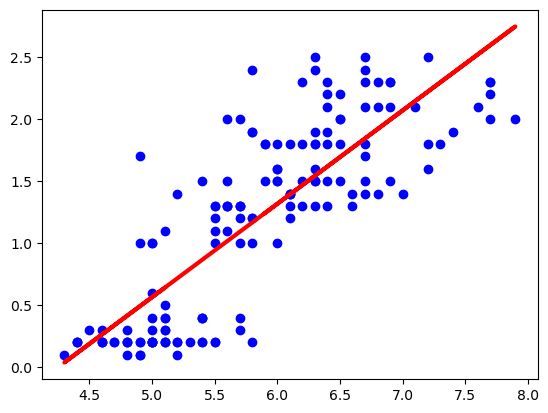

In [8]:
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()

Jakość modelu możemy ocenić wykorzystując np. bład średniokwadratowy: 

In [9]:
e = metrics.mean_squared_error(y, y_pred)
e

0.19101500769427363

> **Zadanie** Napisz funkcję, która zwróci parametry $w_0$ oraz $w_1$ modelu prostej regresji liniowej oraz $e$ wartość błędu średniokwadratowego dopasowania. Argumentem będzie ramka danych oraz numery dwóch atrybutów.

In [10]:

def linear_regression_params(df, ind_x, ind_y):
    x = df.iloc[:,ind_x].values.reshape(-1,1)
    y = df.iloc[:,ind_y].values.reshape(-1,1)

    regressor = LinearRegression()  
    regressor.fit(x,y)
    return regressor.intercept_[0], regressor.coef_[0][0], metrics.mean_squared_error(y, regressor.predict(x))

> **Zadanie** Korzystając z powyższej funkcji oceń modele regresyjne dla poszczególnych par atrybutów. Dla których par błąd dopasowania (obciążenie / bias) modelu jest największa, a dla których - najmniejsza. Czy można zauważyć zależność tej miary od miary korelacji ?


In [11]:
lista_w0_MSE = []
for i in numerical_iris:
    for j in numerical_iris:
        if i != j:
            w0, w1, e = linear_regression_params(iris, iris.columns.get_loc(i), iris.columns.get_loc(j))
            print(f"Regresja liniowa {i} -> {j}: w0 = {w0}, w1 = {w1}, błąd MSE = {e}")
            lista_w0_MSE.append((i, j, w0, w1, e))

print("=====================================\nMaksymalne i minimalne wartości w0:")

print("\nWartości bezwzględne:")
lista_w0_MSE.sort(key=lambda x: abs(x[2]), reverse=True)
print(f"Maksimum: {lista_w0_MSE[0]}")
print(f"Minimum: {lista_w0_MSE[-1]}")

print("\nWartości względne:")
lista_w0_MSE.sort(key=lambda x: x[2], reverse=True)
print(f"Maksimum: {lista_w0_MSE[0]}")
print(f"Minimum: {lista_w0_MSE[-1]}")

print("=====================================\nMaksymalne i minimalne wartości w1:")

print("\nWartości bezwzględne:")
lista_w0_MSE.sort(key=lambda x: abs(x[3]), reverse=True)
print(f"Maksimum: {lista_w0_MSE[0]}")
print(f"Minimum: {lista_w0_MSE[-1]}")

print("\nWartości względne:")
lista_w0_MSE.sort(key=lambda x: x[3], reverse=True)
print(f"Maksimum: {lista_w0_MSE[0]}")
print(f"Minimum: {lista_w0_MSE[-1]}")


print("=====================================\nMaksymalne i minimalne wartości MSE:")
lista_w0_MSE.sort(key=lambda x: x[4], reverse=True)
print(f"Maksimum: {lista_w0_MSE[0]}")
print(f"Minimum: {lista_w0_MSE[-1]}")

Regresja liniowa sepal_length -> sepal_width: w0 = 3.418946836103816, w1 = -0.061884797964144166, błąd MSE = 0.1861043758938136
Regresja liniowa sepal_length -> petal_length: w0 = -7.101443369602455, w1 = 1.8584329782548412, błąd MSE = 0.7430610341321241
Regresja liniowa sepal_length -> petal_width: w0 = -3.2002150046491913, w1 = 0.7529175706758456, błąd MSE = 0.19101500769427363
Regresja liniowa sepal_width -> sepal_length: w0 = 6.526222550894481, w1 = -0.22336106112989984, błąd MSE = 0.6717073053166401
Regresja liniowa sepal_width -> petal_length: w0 = 9.063150606211906, w1 = -1.7352215240553546, błąd MSE = 2.5272893400281986
Regresja liniowa sepal_width -> petal_width: w0 = 3.1568722857062106, w1 = -0.6402765871258865, błąd MSE = 0.49976926485227013
Regresja liniowa petal_length -> sepal_length: w0 = 4.306603415047579, w1 = 0.40892227735118536, błąd MSE = 0.16350022510554504
Regresja liniowa petal_length -> sepal_width: w0 = 3.4548744766780657, w1 = -0.10578529625990743, błąd MSE = 

### w0 (intercept)

format: (atrybut1, atrybut2, intercept, MSE)

Maksymalne i minimalne wartości w0:

Wartości bezwzględne:
Maksimum: ('sepal_width', 'petal_length', 9.063150606211906, 2.5272893400281986) <---- atrybuty sepal_width i petal_length są słabo skorelowane

Minimum: ('petal_length', 'petal_width', -0.3630755213190291, 0.04206730919499318) <---- atrybuty petal_length i petal_width są silnie skorelowane dodatnio

Wartości względne:
Maksimum: ('sepal_width', 'petal_length', 9.063150606211906, 2.5272893400281986)  <---- atrybuty sepal_width i petal_length są słabo skorelowane

Minimum: ('sepal_length', 'petal_length', -7.101443369602455, 0.7430610341321241) <---- atrybuty sepal_length i petal_length są silnie skorelowane dodatnio

### w1 (coef)

format: (atrybut1, atrybut2, intercept, MSE)

Wartości bezwzględne:

Maksimum: ('petal_width', 'petal_length', 1.0835580328505117, 2.2299404951218635, 0.2256316877786924)  <---- atrybuty petal_length i petal_width są silnie skorelowane dodatnio

Minimum: ('sepal_length', 'sepal_width', 3.418946836103816, -0.061884797964144166, 0.1861043758938136) <---- atrybuty sepal_length i sepal_width są słabo skorelowane

Wartości względne:

Maksimum: ('petal_width', 'petal_length', 1.0835580328505117, 2.2299404951218635, 0.2256316877786924) <---- atrybuty petal_length i petal_width są silnie skorelowane dodatnio

Minimum: ('sepal_width', 'petal_length', 9.063150606211906, -1.7352215240553546, 2.5272893400281986) <---- atrybuty sepal_width i petal_length są słabo skorelowane

### MSE

format: (atrybut1, atrybut2, intercept, MSE)

Maksymalne i minimalne wartości MSE:

Maksimum: ('sepal_width', 'petal_length', 9.063150606211906, 2.5272893400281986) <---- atrybuty sepal_width i petal_length są najmniej skorelowane
Minimum: ('petal_length', 'petal_width', -0.3630755213190291, 0.04206730919499318) <---- atrybuty petal_length i petal_width są najbardziej skorelowane

# 3. Błąd uczenia i generalizacji

Sprawdzenie skuteczności modelu regresyjnego wymaga wcześniejszego podziału referencyjnego zbioru danych na (w najprostszym przypadku) dwa podzbiory: uczący i testowy. Pierwszy jest wykorzystywany do wyznaczeniu parametrów modelu regresyjnego, drugi - do testowania modelu. Błąd predykcji dla zbioru uczącego to błąd uczenia, określający stopień dopasowania modelu do znanych danych. Błąd predykcji dla zbioru testowego pokazuje przydatność modelu do przewidywania dla danych, które nie zostały wykorzystane w procesie uczenia. Pokazuje on na ile model jest ogólny tzn. sprawdza się dla dowolnych danych i dlatego jest nazywany błędem generalizacji.

Zbiór `dane10` zawiera dane charakteryzujące się dwoma atrybutami opisującymi (cechami) należące do trzech klas. Każda klasa definiuje jeden podzbiór danych. Podzbiory te wykorzystamy do badania modeli regresyjnych.

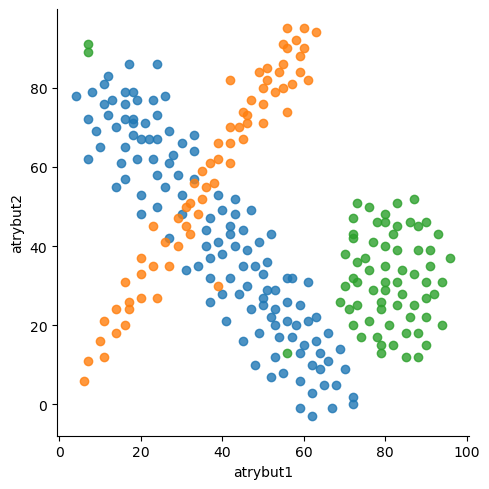

In [12]:
d = pd.read_csv('MED_Lab_dane/dane10.csv')
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)
plt.show()

Wybieramy podzbiór `klasa 3` i generujemy modeli liniowy.

In [13]:
dd = d[d.klasa == 'klasa 3']
x = dd.iloc[:,0].values.reshape(-1,1)
y = dd.iloc[:,1].values.reshape(-1,1)
print(x.T)
print(y.T)

[[61 66 69 72 62 62 59 55 52 48 45 37 40 41 34 37 31 27 20 14  7  4 17 26
  33 43 47 52 57 63 70 72 67 59 53 59 56 49 51 49 47 46 45 43 40 36 37 33
  30 24 30 36 39 33 18 24 30 27 23 16  7 10 20  9 15 24 12 16 19 24 29 26
  21 18 20 16 16 11 11  8 12 14 18 13 18 16 19 23 22 28 27 24 68 64 64 66
  65 63 59 62 61 58 60 57 56 56 51 53 53 50 48 45 43 42 42 40 39 37 42 44
  46 50 50 52 53 54]]
[[31 18 14  2 -3  3 -1  8  7 10 16 32 28 21 35 26 34 42 48 55 62 78 86 78
  68 52 49 43 32 22  9  0 -1  6 12 25 32 18 36 41 24 39 44 48 49 40 47 64
  53 50 48 44 53 57 79 73 66 69 77 57 72 65 53 69 61 86 83 79 77 67 58 55
  71 68 67 72 76 76 81 79 73 70 71 77 72 65 62 62 67 63 61 58  5  9 13 11
   5 16 13 10 21 20 15 17 21 26 29 24 29 33 35 35 40 45 43 38 41 37 32 28
  30 27 25 22 20 17]]


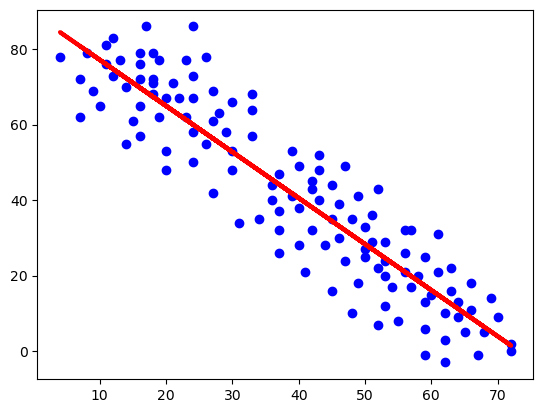

In [14]:
%matplotlib inline
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
plt.scatter(x, y,  color='blue')
plt.plot(x, y_pred, color='red', linewidth=3)
plt.show()


> **Zadanie** Obejrzyj modele dla podzbiorów należących do innych klas. Zwróć szczególną uwage na klasę nr 1.

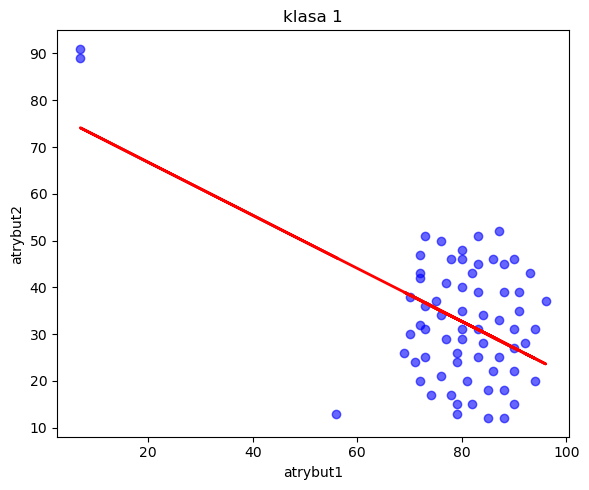

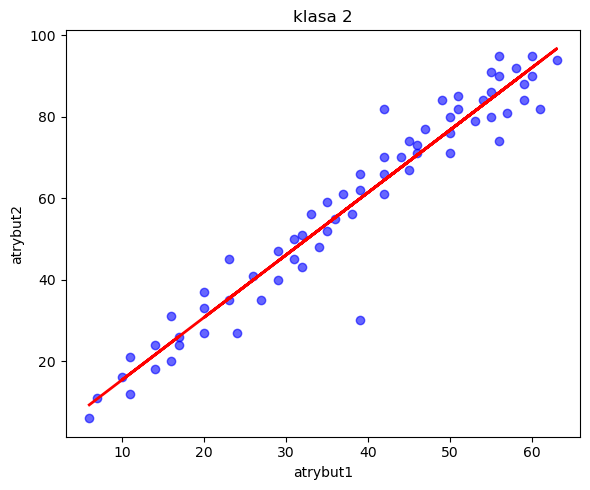

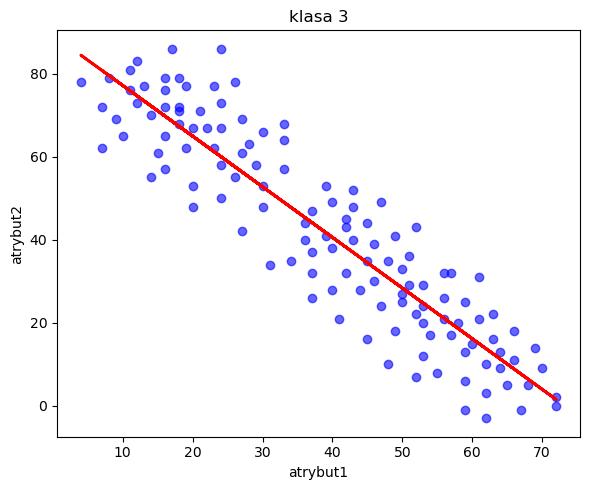

In [15]:
for klasa in ["klasa 1", "klasa 2", "klasa 3"]:
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)

    regressor = LinearRegression()
    regressor.fit(x, y)
    y_pred = regressor.predict(x)

    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, color='blue', alpha=0.6)
    plt.plot(x, y_pred, color='red', linewidth=2)
    plt.title(klasa)
    plt.xlabel('atrybut1')
    plt.ylabel('atrybut2')
    plt.tight_layout()
    plt.show()


### Odpowiedź
Rozkład punktów w klasie 1 - znaczna ilość punktów jest skupiona w prawym dolnym rogu, pojedyncze punkty znajdują się w lewym górnym rogu co powoduje spadek prezycji przewidywania w tym zakresie. POzostałe klasy mają punkty rozłożone w poblizu prostej co sprawia, że metdoa regresji jest skuteczna.


Badanie modeli regresyjnych z podziałem na zbiór uczący i testowy

In [16]:
x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

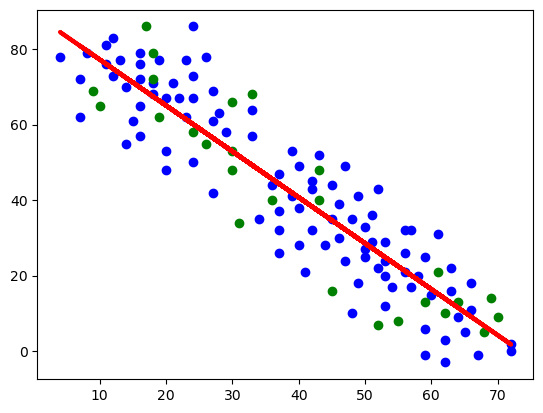

błąd uczenia 97.90961693115158
błąd generalizacji 109.05710100604452


In [17]:


regressor = LinearRegression()  
regressor.fit(x_ucz,y_ucz) 
y_pred_ucz = regressor.predict(x_ucz)
e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
y_pred_test = regressor.predict(x_test)
e_test = metrics.mean_squared_error(y_test, y_pred_test)
plt.scatter(x_ucz, y_ucz, color='blue')
plt.scatter(x_test, y_test, color='green')
plt.plot(x_ucz, y_pred_ucz, color='red', linewidth=3)
plt.show()
print('błąd uczenia',e_ucz)
print('błąd generalizacji',e_test)

> **Zadanie** Zbadaj błąd uczenia i generalizacji dla wszystkich trzech klas, dla każdej kilkukrotnie powtarzając podział zbioru na uczący i testowy. Oceń stabilość modeli tj. zmienność parametrów modelu dla różnych podziałów. Dla których klas uzyskane modele są bardziej, a dla których - mniej stabilne? Dlaczego?

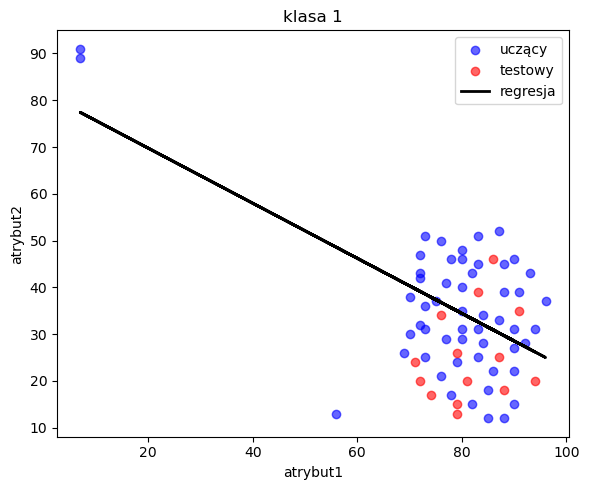

błąd uczenia przy klasie klasa 1: 143.7606
błąd generalizacji przy klasie klasa 1: 195.5516


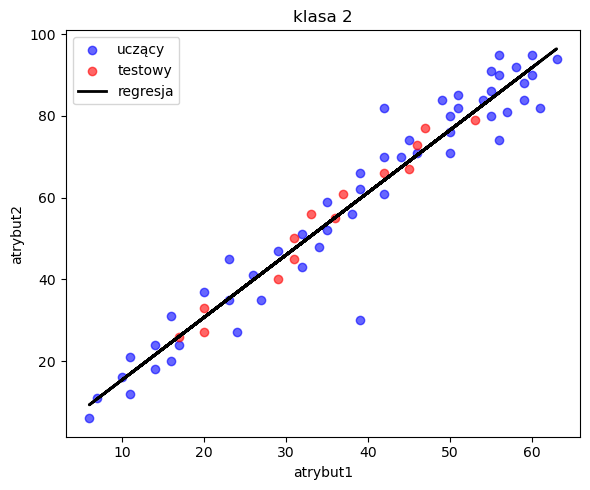

błąd uczenia przy klasie klasa 2: 48.4543
błąd generalizacji przy klasie klasa 2: 10.1807


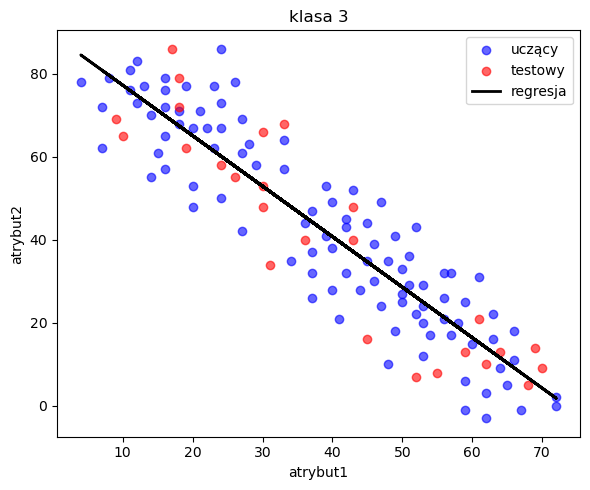

błąd uczenia przy klasie klasa 3: 97.9096
błąd generalizacji przy klasie klasa 3: 109.0571


In [18]:
%matplotlib inline

for klasa in ["klasa 1", "klasa 2", "klasa 3"]:
    dd = d[d.klasa == klasa]
    x = dd.iloc[:,0].values.reshape(-1,1)
    y = dd.iloc[:,1].values.reshape(-1,1)

    # podział
    x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    regressor = LinearRegression()
    regressor.fit(x_ucz, y_ucz)

    y_pred_ucz = regressor.predict(x_ucz)
    y_pred_test = regressor.predict(x_test)

    plt.figure(figsize=(6, 5))
    plt.scatter(x_ucz, y_ucz, color='blue', alpha=0.6, label='uczący')
    plt.scatter(x_test, y_test, color='red', alpha=0.6, label='testowy')
    plt.plot(x_ucz, y_pred_ucz, color='black', linewidth=2, label='regresja')

    plt.title(klasa)
    plt.xlabel('atrybut1')
    plt.ylabel('atrybut2')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # błędy
    e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)
    print(f'błąd uczenia przy klasie {klasa}: {e_ucz:.4f}')
    print(f'błąd generalizacji przy klasie {klasa}: {e_test:.4f}')


# 4. Estymacja parametrów regresji wielomianowej

W przypadku regresji liniowej linia trendu jest linią prostą - jest to szczególny, najprostszy przypadek. W przypadku ogólnym jest to krzywa opisana wielomianem. Współczynniki tego wielomianu mogą być wyznaczane z wykorzystaniem pseudoinwersji, która w efekcie swojego działania minimalizuje sumę kwadratów błędu aproksymacji lub poprzez metody iteracyjnej optymalizacji. Zostało to opisane we wprowadzeniu. Celem tej części laboratorium będzie napisanie programu, który pozwoli na wyznaczenie linii trendu dla punktów zebranych interaktywnie z wykresu. Aproksymatorem będzie w tym przypadku model regresji wielomianowej.  

> **Zadanie** Przy pomocy poniższego kodu wskaż 20 punktów klikając na wykresie tak, by układały się w linię trendu. W efekcie wykonanie poniższego kodu i zebrania punktów otrzymamy ramkę danych z kolumnami x i y. 

(20, 2)


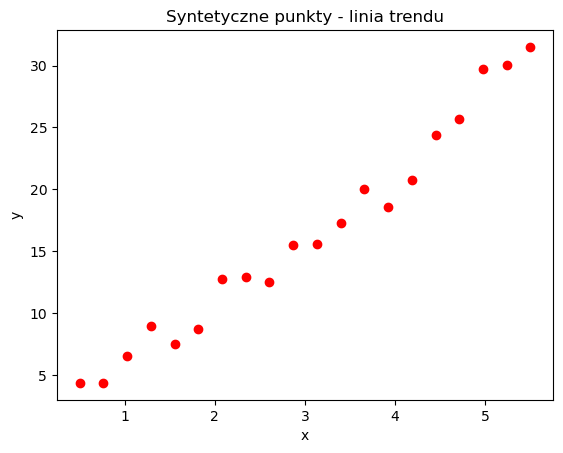

In [19]:
%matplotlib inline
import numpy as np
ile_probek = 20

np.random.seed(42)
xx = np.linspace(0.5, 5.5, ile_probek)
yy = 2 + 3*xx + 0.5*xx**2 + np.random.randn(ile_probek)*1.5
df = pd.DataFrame({'x': xx, 'y': yy})
print(df.shape)
plt.scatter(df.x, df.y, color='red')
plt.title('Syntetyczne punkty - linia trendu')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

W efekcie udało się pozyskać następującą macierz (ramkę) danych:

In [20]:
print(df.info())
df.head(ile_probek)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes
None


,x,y
0,0.500000,4.370071
1,0.763158,4.373282
2,1.026316,6.577142
3,1.289474,8.984337
4,1.552632,7.511997
5,1.815789,8.744709
6,2.078947,12.766672
7,2.342105,12.920196
8,2.605263,12.505276
9,2.868421,15.533023


In [21]:
plt.scatter(df.x, df.y, color='red')

> **Zadanie** Napisz funkcję, która utworzy nam macierz $X$. Macierz $X$ powinna składać się z wektora jednostkowego oraz wektorów zawierających poszczególne potęgi zebranych argumentów (opis we wprowadzeniu). Funkcja ta może tworzyć macierz wykorzystując jako parametr wejściowy stopień wielomianu, którym będziemy chcieli dokonywać aproksymacji.

In [22]:
def macierz_x_wielomianowa(x, stopien):

    x_arr = np.asarray(x).reshape(-1)   
    X = np.ones((x_arr.shape[0], stopien + 1))
    for i in range(1, stopien + 1):
        X[:, i] = x_arr ** i
    return X

> **Zadanie** Przy pomocy funkcji pakietu _numpy_ wyliczającej pseudoinwersję _np.linalg.pinv()_ oraz mnożenia macierzy _np.dot()_ wylicz parametry modelu dla zbioru uczącego.

In [1]:
degree = 4
test_size = 0.2
random_state = 0

for klasa in ["klasa 1", "klasa 2", "klasa 3"]:
    dd = d[d.klasa == klasa]
    x = dd.iloc[:, 0].values.reshape(-1, 1)   # atrybut1
    y = dd.iloc[:, 1].values.reshape(-1, 1)   # atrybut2

    x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

     # podział na zbiór uczący/testowy
    X_ucz = macierz_x_wielomianowa(x_ucz, degree)    
    X_test = macierz_x_wielomianowa(x_test, degree)  

    # obliczenie parametrów theta (w) przy użyciu pseudoinwersji
    theta = np.dot(np.linalg.pinv(X_ucz), y_ucz)

    # predykcje
    y_pred_ucz = np.dot(X_ucz, theta)
    y_pred_test = np.dot(X_test, theta)

    # błędy MSE
    e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
    e_test = metrics.mean_squared_error(y_test, y_pred_test)

    # WYJŚCIE: parametry i błędy
    theta_flat = theta.flatten()
    params_str = ", ".join([f"w{i}={theta_flat[i]:.4f}" for i in range(len(theta_flat))])
    print(f"\n=== {klasa} (stopień={degree}) ===")
    print("Parametry (theta):", params_str)
    print(f"Błąd MSE (uczący): {e_ucz:.6f}")
    print(f"Błąd MSE (testowy): {e_test:.6f}")

    
    plt.figure(figsize=(6, 5))
    
    plt.scatter(x_ucz, y_ucz, label='uczący', marker='o')
    plt.scatter(x_test, y_test, label='testowy', marker='x')

    x_plot = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
    X_plot = macierz_x_wielomianowa(x_plot, degree)
    y_plot = np.dot(X_plot, theta)

    plt.plot(x_plot, y_plot, linewidth=2, label='dopasowanie (theta)', zorder=10)
    plt.title(f"{klasa} — dopasowanie (stopień={degree})")
    plt.xlabel('atrybut1')
    plt.ylabel('atrybut2')
    plt.legend()
    plt.tight_layout()
    plt.show()

NameError: name 'd' is not defined


=== klasa 1 (stopień=1) ===
Parametry (theta): w0=81.5295, w1=-0.5889
Błąd MSE (uczący): 143.760590
Błąd MSE (testowy): 195.551613

=== klasa 2 (stopień=1) ===
Parametry (theta): w0=0.1017, w1=1.5289
Błąd MSE (uczący): 48.454258
Błąd MSE (testowy): 10.180715

=== klasa 3 (stopień=1) ===
Parametry (theta): w0=89.3933, w1=-1.2164
Błąd MSE (uczący): 97.909617
Błąd MSE (testowy): 109.057101

=== klasa 1 (stopień=2) ===
Parametry (theta): w0=99.2671, w1=-1.5986, w2=0.0096
Błąd MSE (uczący): 122.576110
Błąd MSE (testowy): 156.565623

=== klasa 2 (stopień=2) ===
Parametry (theta): w0=-2.4981, w1=1.7213, w2=-0.0027
Błąd MSE (uczący): 48.021246
Błąd MSE (testowy): 9.378860

=== klasa 3 (stopień=2) ===
Parametry (theta): w0=84.7540, w1=-0.8952, w2=-0.0043
Błąd MSE (uczący): 96.335452
Błąd MSE (testowy): 112.400104

=== klasa 1 (stopień=3) ===
Parametry (theta): w0=122.5958, w1=-5.3124, w2=0.0911, w3=-0.0005
Błąd MSE (uczący): 115.731977
Błąd MSE (testowy): 161.353882

=== klasa 2 (stopień=3) ==

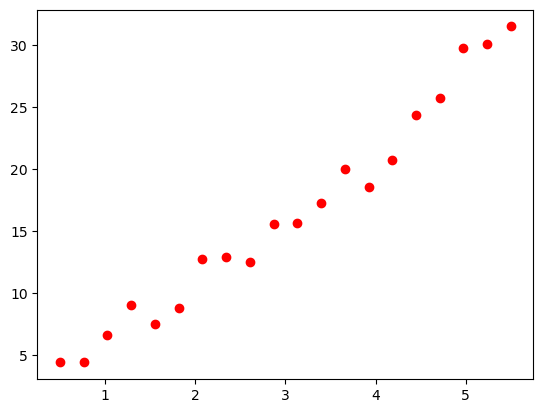

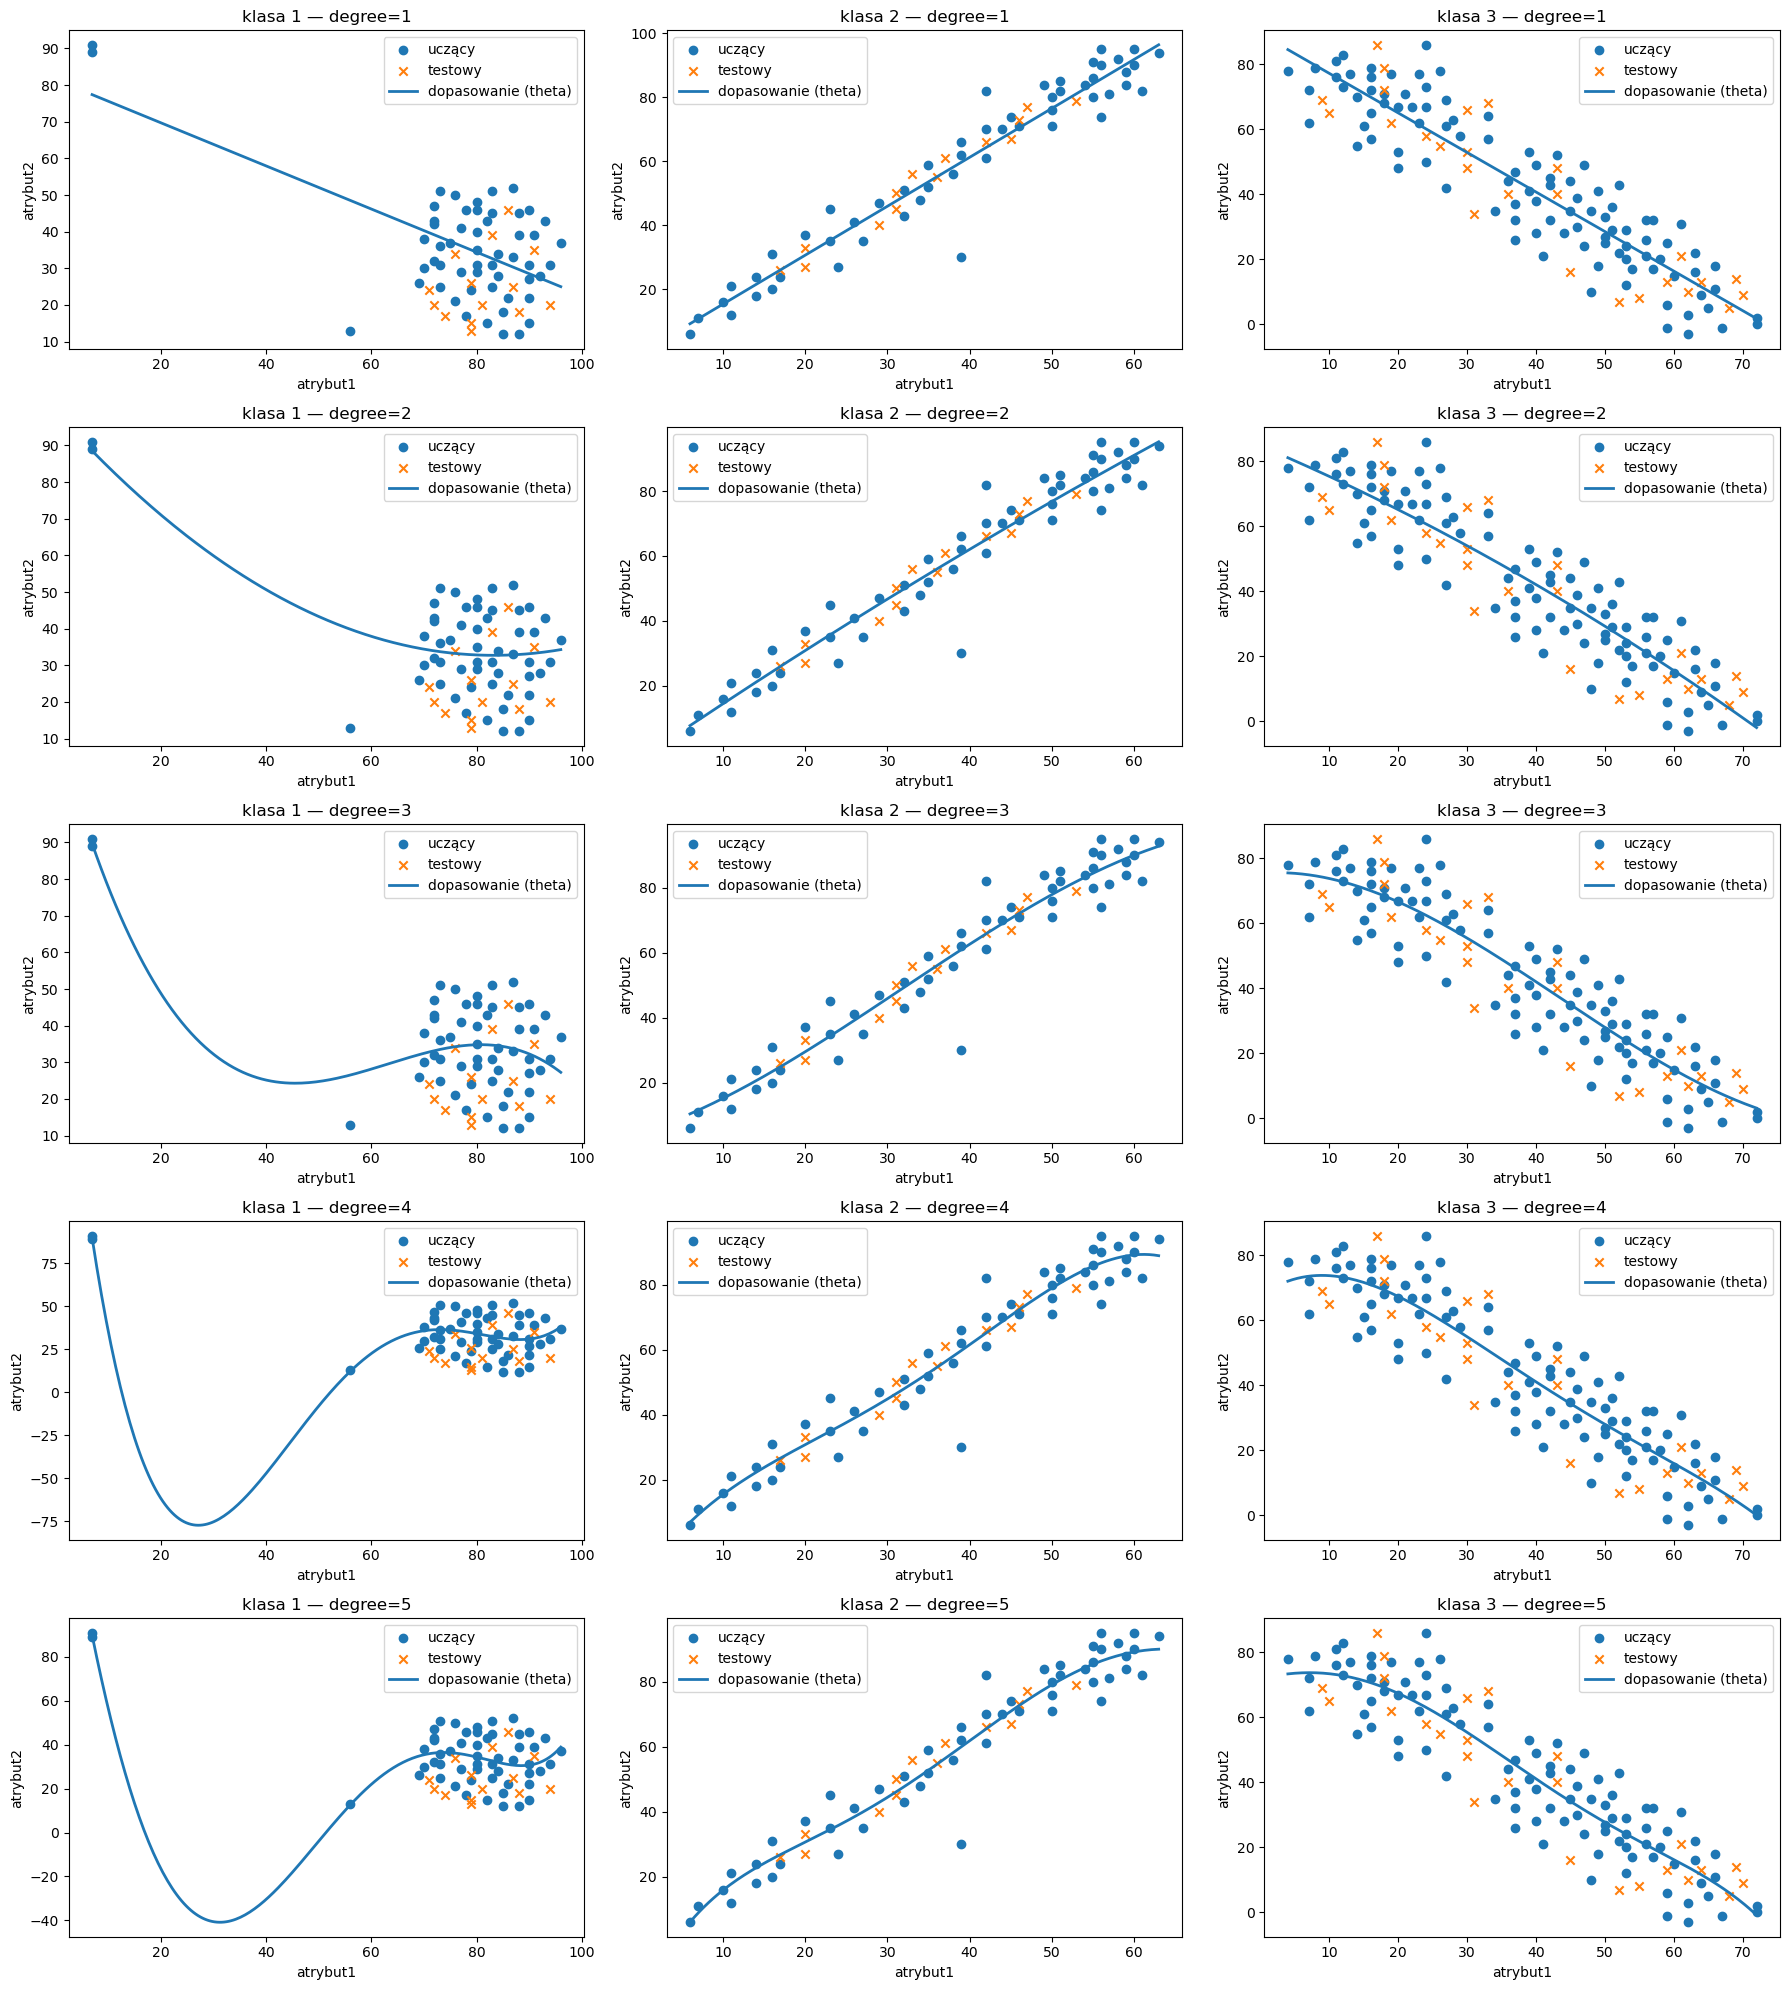

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

degrees = range(1, 6)
test_size = 0.2
random_state = 0

fig, axes = plt.subplots(len(degrees), 3, figsize=(18, 20))
# axes[i, j] - i = degree-1, j = klasa index

klasy = ["klasa 1", "klasa 2", "klasa 3"]

for i, degree in enumerate(degrees):
    for j, klasa in enumerate(klasy):
        dd = d[d.klasa == klasa]
        x = dd.iloc[:, 0].values.reshape(-1, 1)   # atrybut1
        y = dd.iloc[:, 1].values.reshape(-1, 1)   # atrybut2

        x_ucz, x_test, y_ucz, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

        X_ucz = macierz_x_wielomianowa(x_ucz, degree)
        X_test = macierz_x_wielomianowa(x_test, degree)

        # theta = w
        theta = np.dot(np.linalg.pinv(X_ucz), y_ucz)

        # predykcje
        y_pred_ucz = np.dot(X_ucz, theta)
        y_pred_test = np.dot(X_test, theta)

        # błędy MSE
        e_ucz = metrics.mean_squared_error(y_ucz, y_pred_ucz)
        e_test = metrics.mean_squared_error(y_test, y_pred_test)

        # WYJŚCIE w konsoli
        theta_flat = theta.flatten()
        params_str = ", ".join([f"w{i}={theta_flat[i]:.4f}" for i in range(len(theta_flat))])
        print(f"\n=== {klasa} (stopień={degree}) ===")
        print("Parametry (theta):", params_str)
        print(f"Błąd MSE (uczący): {e_ucz:.6f}")
        print(f"Błąd MSE (testowy): {e_test:.6f}")

        # wykres w subplocie
        ax = axes[i, j]
        ax.scatter(x_ucz, y_ucz, label='uczący', marker='o')
        ax.scatter(x_test, y_test, label='testowy', marker='x')

        x_plot = np.linspace(x.min(), x.max(), 200).reshape(-1, 1)
        X_plot = macierz_x_wielomianowa(x_plot, degree)
        y_plot = np.dot(X_plot, theta)
        ax.plot(x_plot, y_plot, linewidth=2, label='dopasowanie (theta)', zorder=10)

        ax.set_title(f"{klasa} — degree={degree}")
        ax.set_xlabel('atrybut1')
        ax.set_ylabel('atrybut2')
        ax.legend()

plt.tight_layout()
plt.show()


> **Zadanie** 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów stopnia 1, 2, 3, 4 i 5.
2. Wyświetl wykres średniokwadratowego błędu dopasowania krzywej do punktów danych, w funkcji złożoności modelu (stopnia wielomianu). Czym się ta funkcja charakteryzuje ?


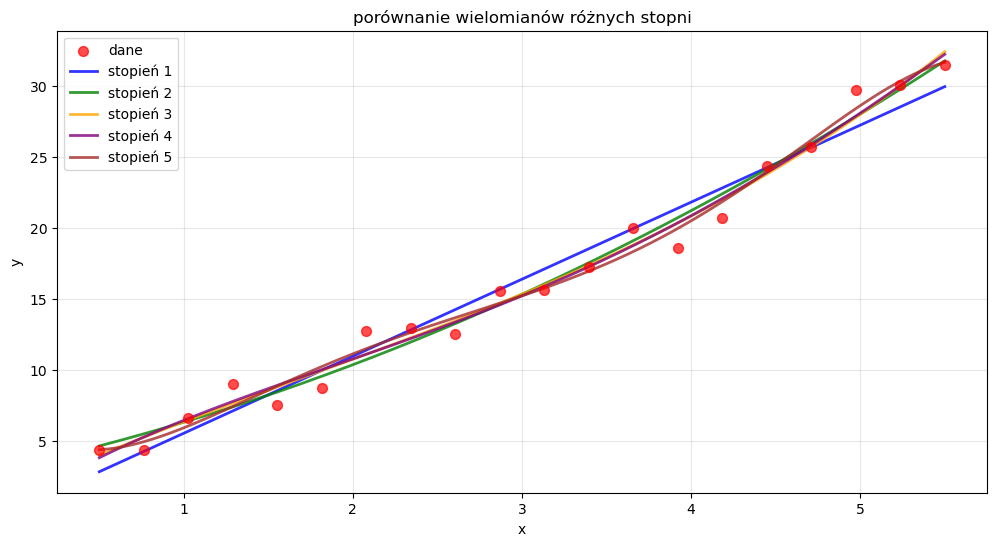

In [180]:
# zadanie 1
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.scatter(df.x, df.y, color='red', s=50, alpha=0.7, label='dane', zorder=5)


x_smooth = np.linspace(df.x.min(), df.x.max(), 300)
degrees = [1, 2, 3, 4, 5]
colors = ['blue', 'green', 'orange', 'purple', 'brown']

for deg, col in zip(degrees, colors):
    X = macierz_x_wielomianowa(df.x, deg)
    y = df.y.values.reshape(-1, 1)
    w = np.linalg.pinv(X) @ y
    Xs = macierz_x_wielomianowa(x_smooth, deg)
    ys = Xs @ w
    plt.plot(x_smooth, ys, color=col, linewidth=2, label=f'stopień {deg}', alpha=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('porównanie wielomianów różnych stopni')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

stopień 1: mse = 2.1132
stopień 2: mse = 1.2217
stopień 3: mse = 1.1126
stopień 4: mse = 1.1025
stopień 5: mse = 0.9686
stopień 6: mse = 0.8977
stopień 7: mse = 0.8868
stopień 8: mse = 0.8376
stopień 9: mse = 0.8372
stopień 10: mse = 0.6539


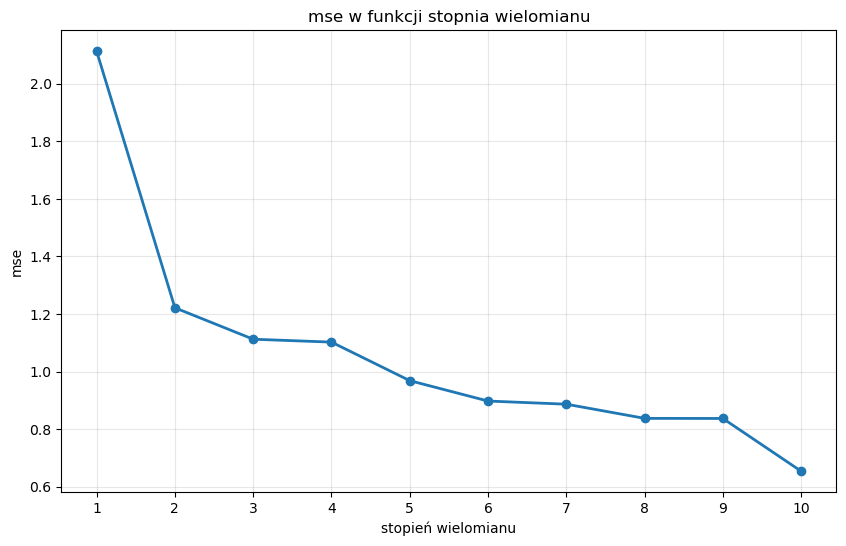

In [185]:
#zadanie 2
degrees = range(1,11)
mse_values = []

for deg in degrees:
    X = macierz_x_wielomianowa(df.x, deg)   
    y = df.y.values.reshape(-1,1)
    w = np.dot(np.linalg.pinv(X), y)              
    y_pred = np.dot(X, w)                            
    mse = metrics.mean_squared_error(y, y_pred)
    mse_values.append(mse)
    print(f'stopień {deg}: mse = {mse:.4f}')

# wykres mse
plt.figure(figsize=(10,6))
plt.plot(degrees, mse_values, 'o-', linewidth=2, markersize=6)
plt.xlabel('stopień wielomianu')
plt.ylabel('mse')
plt.title('mse w funkcji stopnia wielomianu')
plt.grid(alpha=0.3)
plt.xticks(degrees)
plt.show()



> **Zadanie** Zajdź funkcię wbudowaną pakietu `numpy`, która zwraca wartości współczynników wielomianu dla zadanych punktów (czyli realizuje to co powyżej udało się zrobić "ręcznie").

stopień 2

metoda ręczna (pseudoinwersja):
  w = [3.17888711 2.67143062 0.46017504]
  model: y = 3.1789 + 2.6714*x + 0.4602*x²

metoda np.polyfit():
  w = [0.46017504 2.67143062 3.17888711]
  model: y = 3.1789 + 2.6714*x + 0.4602*x²


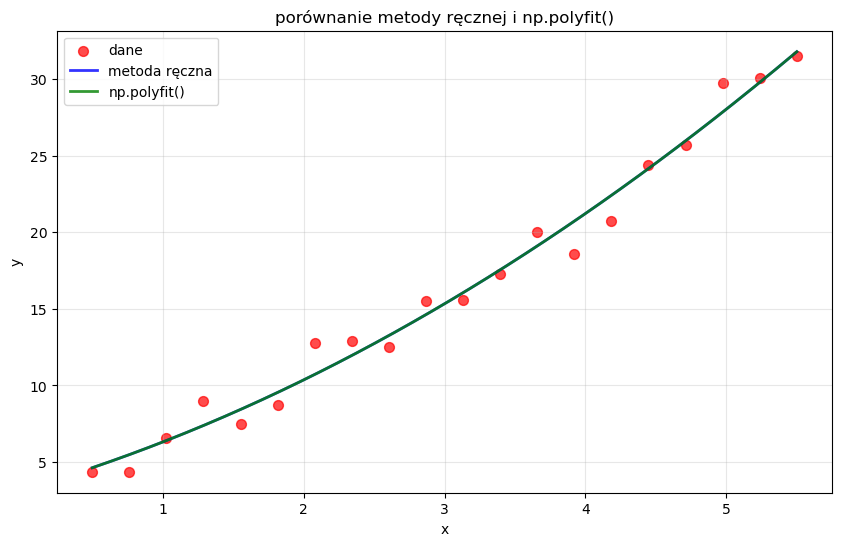

In [187]:
degree = 2

# metoda ręczna (pseudoinwersja)
X = macierz_x_wielomianowa(df.x, degree)
y = df.y.values.reshape(-1,1)
w_manual = np.dot(np.linalg.pinv(X), y)  # obliczenie parametrów

# metoda wbudowana numpy
w_polyfit = np.polyfit(df.x, df.y, degree)

# wypisanie wyników
print(f"stopień {degree}\n")
print("metoda ręczna (pseudoinwersja):")
print(f"  w = {w_manual.flatten()}")
print(f"  model: y = {w_manual[0,0]:.4f} + {w_manual[1,0]:.4f}*x + {w_manual[2,0]:.4f}*x²\n")

print("metoda np.polyfit():")
print(f"  w = {w_polyfit}")
print(f"  model: y = {w_polyfit[2]:.4f} + {w_polyfit[1]:.4f}*x + {w_polyfit[0]:.4f}*x²")

# wizualizacja
plt.figure(figsize=(10,6))
plt.scatter(df.x, df.y, color='red', s=50, alpha=0.7, label='dane')

x_smooth = np.linspace(df.x.min(), df.x.max(), 300)

# predykcja ręczna
X_smooth = macierz_x_wielomianowa(x_smooth, degree)
y_smooth_manual = np.dot(X_smooth, w_manual)

# predykcja np.polyfit()
y_smooth_polyfit = np.polyval(w_polyfit, x_smooth)

plt.plot(x_smooth, y_smooth_manual, 'b-', linewidth=2, label='metoda ręczna', alpha=0.8)
plt.plot(x_smooth, y_smooth_polyfit, 'g-', linewidth=2, label='np.polyfit()', alpha=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('porównanie metody ręcznej i np.polyfit()')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


> **Zadanie** Podziel zbiór na uczacy i testowy, a następnie powtórz wcześniejszy eksperyment z uwzględnieniem tego podziału. W szczególności: 
1. Wyświetl na pojedynczym wykresie, punkty danych oraz linie trendów dla wielomianów kilku wybranych stopni wyznaczonych dla zbioru uczącego.
2. Wyświetl wykres błędu uczenia (tj. dopasowania punktów zbioru uczącego) i generalizacji (tj. dopasowania punktów zbioru testowego) w funkcji złożoności modelu (stopnia wielomianu).
3. Wybierz stopień wielomianu, który najlepiej opisuje Twoje punkty danych z uwzględnieniem podziału na zbiór uczący i testowy. Co należy uwzględnić dokonując takiego wyboru ?

rozmiar zbioru uczącego: 14
rozmiar zbioru testowego: 6


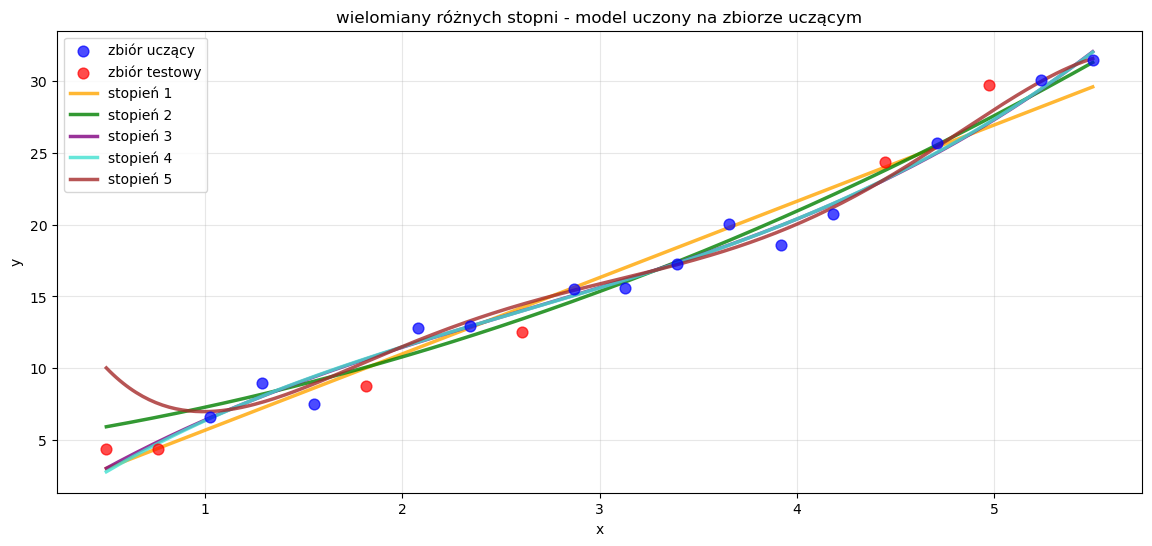

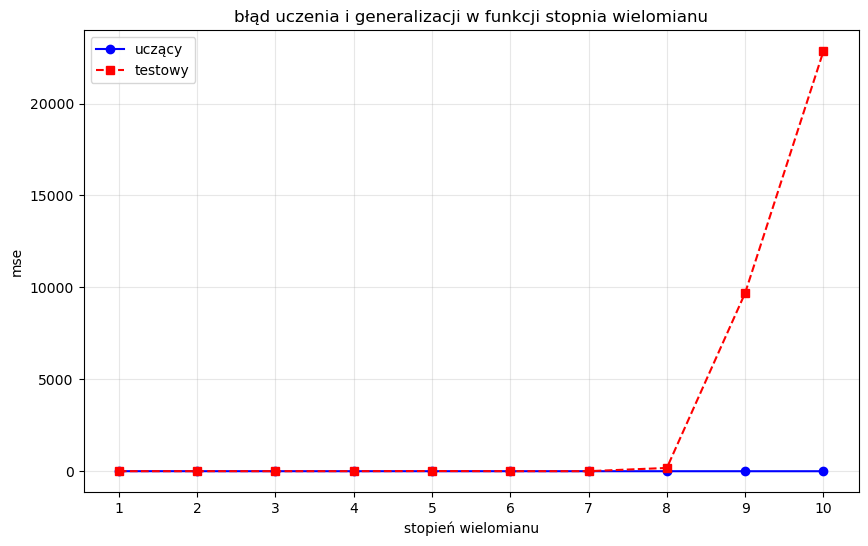

In [193]:
# podział na zbiór uczący i testowy
x_ucz, x_test, y_ucz, y_test = train_test_split(df.x, df.y, test_size=0.3, random_state=42)
print(f"rozmiar zbioru uczącego: {len(x_ucz)}")
print(f"rozmiar zbioru testowego: {len(x_test)}")

# wykres danych i trendów
plt.figure(figsize=(14,6))
plt.scatter(x_ucz, y_ucz, color='blue', s=60, alpha=0.7, label='zbiór uczący', zorder=5)
plt.scatter(x_test, y_test, color='red', s=60, alpha=0.7, label='zbiór testowy', zorder=5)

x_smooth = np.linspace(df.x.min(), df.x.max(), 300)
degrees = [1, 2, 3, 4, 5]          
colors = ['orange', 'green', 'purple', 'turquoise', 'brown']

for deg, col in zip(degrees, colors):
    X_ucz = macierz_x_wielomianowa(x_ucz, deg)
    Y_ucz = y_ucz.values.reshape(-1,1)
    w = np.dot(np.linalg.pinv(X_ucz), Y_ucz)
    
    X_smooth = macierz_x_wielomianowa(x_smooth, deg)
    y_smooth = np.dot(X_smooth, w)
    
    plt.plot(x_smooth, y_smooth, color=col, linewidth=2.5, label=f'stopień {deg}', alpha=0.8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('wielomiany różnych stopni - model uczony na zbiorze uczącym')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# obliczenie mse dla uczącego i testowego
degrees_range = range(1,11)
mse_ucz = []
mse_test = []

for deg in degrees_range:
    X_ucz = macierz_x_wielomianowa(x_ucz, deg)
    Y_ucz = y_ucz.values.reshape(-1,1)
    w = np.dot(np.linalg.pinv(X_ucz), Y_ucz)
    
    # predykcja ucząca i testowa
    y_pred_ucz = np.dot(X_ucz, w)
    X_test_deg = macierz_x_wielomianowa(x_test, deg)
    y_pred_test = np.dot(X_test_deg, w)
    
    mse_ucz.append(metrics.mean_squared_error(Y_ucz, y_pred_ucz))
    mse_test.append(metrics.mean_squared_error(y_test.values.reshape(-1,1), y_pred_test))


# obliczenie mse dla zbioru uczącego i testowego
degrees_range = range(1, 11)
mse_ucz = []
mse_test = []

x_ucz_arr = np.asarray(x_ucz).reshape(-1,1)
x_test_arr = np.asarray(x_test).reshape(-1,1)
y_ucz_arr = np.asarray(y_ucz).reshape(-1,1)
y_test_arr = np.asarray(y_test).reshape(-1,1)

for deg in degrees_range:
    X_ucz = macierz_x_wielomianowa(x_ucz_arr, deg)
    w = np.dot(np.linalg.pinv(X_ucz), y_ucz_arr)

    y_pred_ucz = np.dot(X_ucz, w)
    X_test_deg = macierz_x_wielomianowa(x_test_arr, deg)
    y_pred_test = np.dot(X_test_deg, w)

    mse_ucz.append(metrics.mean_squared_error(y_ucz_arr, y_pred_ucz))
    mse_test.append(metrics.mean_squared_error(y_test_arr, y_pred_test))

# wykres mse
plt.figure(figsize=(10,6))
plt.plot(degrees_range, mse_ucz, 'o-', color='blue', label='uczący')
plt.plot(degrees_range, mse_test, 's--', color='red', label='testowy')
plt.xlabel('stopień wielomianu')
plt.ylabel('mse')
plt.title('błąd uczenia i generalizacji w funkcji stopnia wielomianu')
plt.xticks(degrees_range)
plt.grid(alpha=0.3)
plt.legend()
plt.show()



> **Zadanie** Odpowiedz na następujące pytania sprawdzające:
1. Czy jesteśmy w stanie zminimalizować błąd uczenia do 0, jeśli tak to jaki warunek musi być spełniony?
2. Czy powinniśmy tak dobierać stopień wielomianu aby błąd uczenia był jak najmniejszy?
3. Czy równanie zawsze posiada rozwiązanie przybliżone?
4. Co się dzieje z wielkością parametrów modelu w miarę zwiększania stopnia wielomianu?

1. Tak — błąd uczenia może być =0 jeśli model ma wystarczającą pojemność (np. wielomian stopnia ≥ N−1 dla N różnych punktów) i macierz projektów X pozwala na dokładne dopasowanie (brak degeneracji).
2. Nie — minimalizowanie tylko błędu uczenia prowadzi do przeuczenia. Stopień wybiera się tak, by minimalizować błąd na walidacji/testach (trade‑off bias/variance).
3. Tak — zawsze istnieje rozwiązanie najmniejszych kwadratów (pseudoinwersja np.linalg.pinv zwraca je). Rozwiązanie jest jednoznaczne tylko gdy kolumny X są liniowo niezależne (pełny rząd kolumn).
4. Zwykle rosną wartości współczynników (szczególnie wyższych potęg), co prowadzi do niestabilności numerycznej i zwiększonej wariancji modelu 